<a href="https://www.inove.com.ar"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/PA%20Banner.png" width="1000" align="center"></a>


# Segmentación de países

Crear un modelo de segmentación para la clasificación de paises por categoría (desarrollado, en desarrollo, subdesarollado) según sus datos a nivel macro<br>
v1.1

In [18]:
import os
import platform

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Recolectar datos
<div align="center"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline1.png" width="1000" align="middle"></div>

In [19]:
if os.access('Country-data.csv', os.F_OK) is False:
    if platform.system() == 'Windows':
        !curl https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/Country-data.csv > Country-data.csv
    else:
        !wget Country-data.csv https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/Country-data.csv

### `Country-data.csv`:
El dataset **`Country-data.csv`** contiene datos a nivel macroeconomía, ingresos y poblacional sobre países del mundo para su segmentación.<br>
[Dataset source](Country-data.csvn)
- **country** --> nombre del país
- **child_mort** --> cuantos niños menores a 5 años mueren de cada 1000
- **exports** --> exportación de bienes y servicios per cápita
- **health** --> inversiones en salud per cápita
- **import** --> importación de bienes y servicios per cápita
- **Income** --> ingresos por persona (neto)
- **Inflation** --> inflación anual
- **life_expec** --> Promedio de expectativa de vida
- **total_fer** --> Cuantos niños por pareja hay en promedio
- **gdpp** --> Producto bruto interno per cápita

In [20]:
df = pd.read_csv("Country-data.csv")

# Procesar datos
<div align="center"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline2.png" width="1000" align="middle"></div>

In [21]:
# Alumno, inspeccione el dataset, visualice las columnas que posee y sus primeras filas
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [22]:
# Alumno, realice una inspeccion del dataset en búsqueda de elementos faltantes
des = df.describe()
des.loc['Nan'] = df.isna().sum()
des.loc['%Nan'] = (df.isna().mean())*100
des

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000
Nan,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
%Nan,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [23]:
# Alumno: ¿Cuántas filas/datos hay para analizar?
print(f' hay {df.shape[0]} filas y {df.shape[1]} columnas')

 hay 167 filas y 10 columnas


# Explorar datos
<div align="center"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline3.png" width="1000" align="middle"></div>

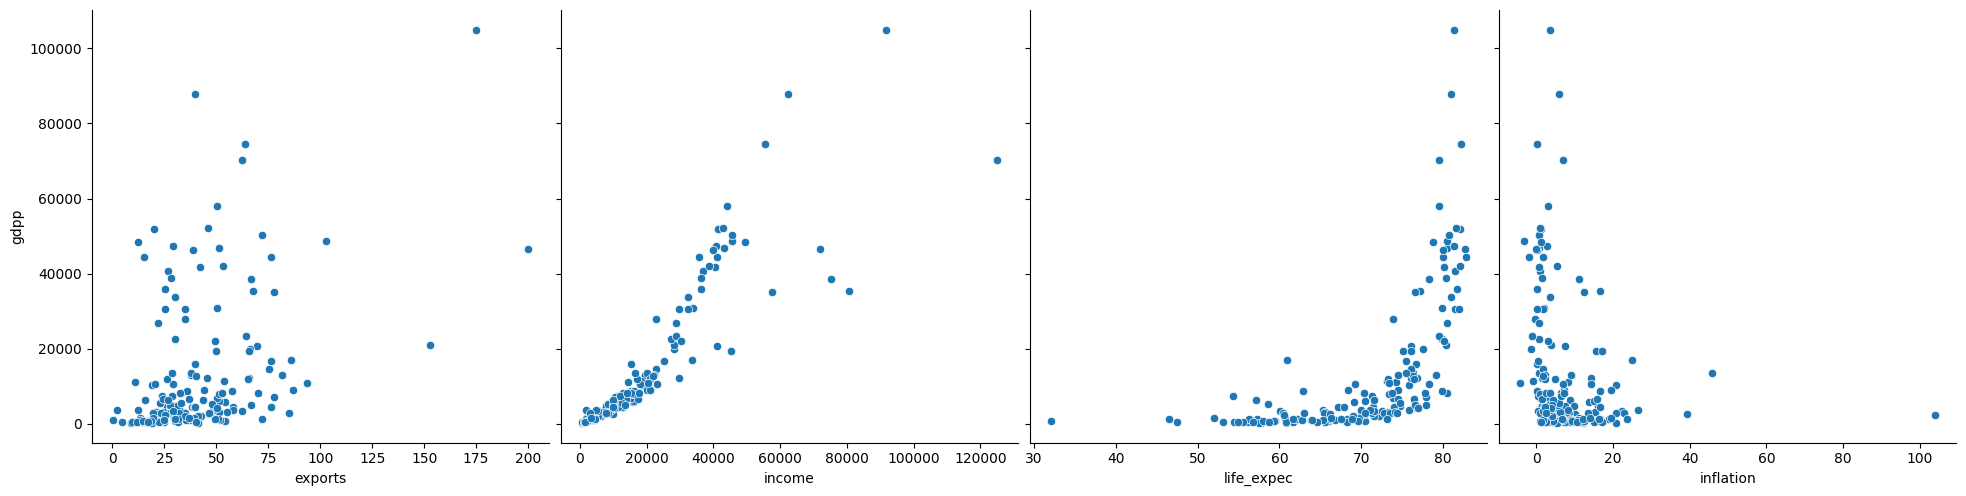

In [24]:
# Observar todas las relaciones entre el feature del producto bruto interno
# y los siguientes features
# Utilizar pairplot con y_vars=['gdpp']
# Utilizar pairplot con x_vars=['exports', 'income', 'life_expec', 'inflation']
# Recordar desactivar la diagonal(diag_kind=None,)
df1 = df.copy()
pp = sns.pairplot(data=df1, x_vars=['exports', 'income', 'life_expec', 'inflation'], y_vars=['gdpp'], diag_kind=None, height=5)
plt.show()

Deberían observar que a medida que aumenta el producto bruto interno aumenta la exportación, el ingreso por persona (incoma), la expectativa de vida (life_expec) y baja la inflación (inflation). Este parámetro lo debe utilizar luego para determinar si los paises segmentados son:
- desarrollados
- en_desarrollo
- subdesarrollados

# Entrenar modelo
<div align="center"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline4.png" width="1000" align="middle"></div>

In [35]:
df2 = df1.drop(columns=['country'])
df2.head()

X_means = df2.values

#### Crear un modelo de segmentación con Kmeans
Parámetros
- n_clusters --> (k) número de clusters/grupos (defecto 5)
- init --> método utilizado para determianr donde comienzan los clusters
 - k-means++ --> mecanismo inteligente para determinar el comienzo (defecto)
 - random --> los centros se determinarn aleatoriamente
- max_iter --> cantidad de iteración (defecto 300)

In [36]:
# Almuno: Entrenar un modelo de Kmeans en un rango de cluster (2, 10)
# Conservar el resultado de "inertial" para utilizar como métrica de selccion
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

def find_best_model(X, max_clusters=10):

    n_clusters = list(range(2, max_clusters+1)) ## --> [2, 3, 4, 5, 6, 7, 8, 9, 10]
    ensayos = len(n_clusters)                   ## --> 9 (Cantidad de elementos en la lista de clusters)

    # Arma un array con 9 elementos todos ceros,
    # que se sobreescribirán por un lado con los errore
    # y por el otro con el score
    array_error = np.zeros((ensayos)) ## --> array([0., 0., 0., 0., 0., 0., 0., 0., 0.])
    array_score = np.zeros((ensayos)) ## --> array([0., 0., 0., 0., 0., 0., 0., 0., 0.])

    for i in range(ensayos): ## --> ensayos = 9
        # En cada iteración se entrenará un modelo de Kmeans,
        # varieando la cantidad de cluster a medida que itere
        # 'k-means++': selecciona los centroides de clúster iniciales.
        #  random_state=0, determina la generación de números aleatorios para la inicialización del centroide, al ser cero
        # producirá los mismos resultados en diferentes llamadas.
        # Entrena con fit
        # Calcula el error con kmeans.inertia_, y a su vez se guarda el array_error.
        # Calcula el score con silhouette_score(X, kmeans.labels_), y a su vez se guarda el array_score
        kmeans = KMeans(n_clusters=n_clusters[i], init="k-means++", random_state=0)
        kmeans.fit(X)
        array_error[i] = kmeans.inertia_
        array_score[i] = silhouette_score(X, kmeans.labels_)

    return array_error, array_score, n_clusters

In [38]:
# Dibujar la evolucion del error (inertia) y deteminar el
# punto de quiebre (elbow point)

# Invocamos la función find_best_model, pasándole los valores de X
array_error, array_score, n_clusters = find_best_model(X_means)

def graficar_punto_codo(array_error, array_score, n_clusters):
  # Crea el espacio para dibujar y del gráfico.
  fig = plt.figure()
  ax = fig.add_subplot()

  # Se gráfica dos líneas en un mismo gráfico.
  # n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
  # array_error/array_error.max(), divide cada error por el máximo error
  ax.plot(n_clusters, array_error/array_error.max(), label='error')
  ax.plot(n_clusters, array_score, label='score')
  # Grilla de fondo y color
  ax.grid('dashed')
  # Leyenda
  ax.legend()
  # Muestra el gráfico
  plt.show()

  # Mejor cluster, se obtiene por la ubicación del máximo score.
  # Para ello, en el array que contiene todos los clusters probados n_clusters
  # Accedemos con cortechetes y se le indica el máximo score con argmax() --> array_score.argmax()
  best_cluster = n_clusters[array_score.argmax()]
  print('El mejor resultado se consigue con clusters=', best_cluster)



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

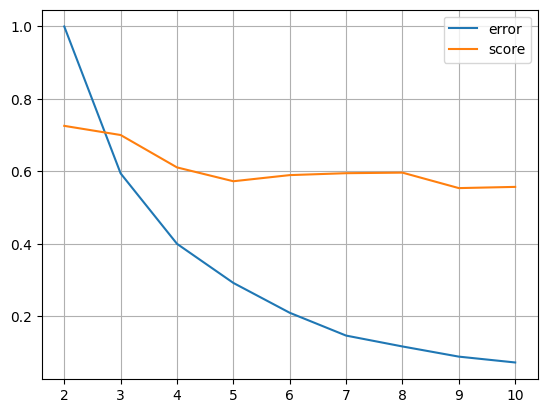

El mejor resultado se consigue con clusters= 2


In [39]:
#Graficar putno codo
graficar_punto_codo(array_error, array_score, n_clusters)

Se puede observar que el punto de elbow podría ser con cluster=4, pero ya sabemos de ante mano que queremos dividir el dataset en 3 grupos, utilizaremos n_clusters=3

In [41]:
# Alumno: Entrenar el modelo con el mejor n_clusters=3
# y determinar los labels
kmeans = KMeans(n_clusters=4, init="k-means++", random_state=0)
kmeans.fit(X_means)
labels = kmeans.predict(X_means)
labels

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([1, 1, 1, 1, 3, 3, 1, 2, 2, 1, 3, 3, 1, 3, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3,
       2, 1, 1, 1, 1, 3, 1, 3, 1, 2, 2, 1, 1, 1, 2, 1, 3, 1, 1, 1, 1, 1,
       1, 3, 2, 1, 1, 1, 1, 2, 3, 2, 1, 2, 1, 3, 1, 1, 2, 1, 1, 3, 1, 1,
       1, 3, 3, 0, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 3, 1, 1, 0, 3, 1, 1, 1, 1, 1, 3, 3, 0, 3, 3, 1, 1, 3, 1, 1, 3,
       1, 2, 3, 3, 1, 1, 3, 3, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 3,
       1, 1, 1, 2, 2, 2, 3, 1, 1, 3, 1, 1, 1], dtype=int32)

In [42]:
# Alumno: Sumar la columna de labels con el nombre de countryseg (customer segmentation)
# a su dataset
# Copia
df3 = df2.copy()
df3['countryseg'] = labels
df3.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,countryseg
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,3


# Validar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline5.png" width="1000" align="middle">

In [44]:
# Alumno: Calcular la exactitud (accuracy) del modelo
# Calcular la exactitud (accuracy) del modelo
from sklearn.metrics import silhouette_score
silhouette_score (X_means, kmeans.labels_)

0.6109297437247547

# Utilizar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline6.png" width="1000" align="middle">

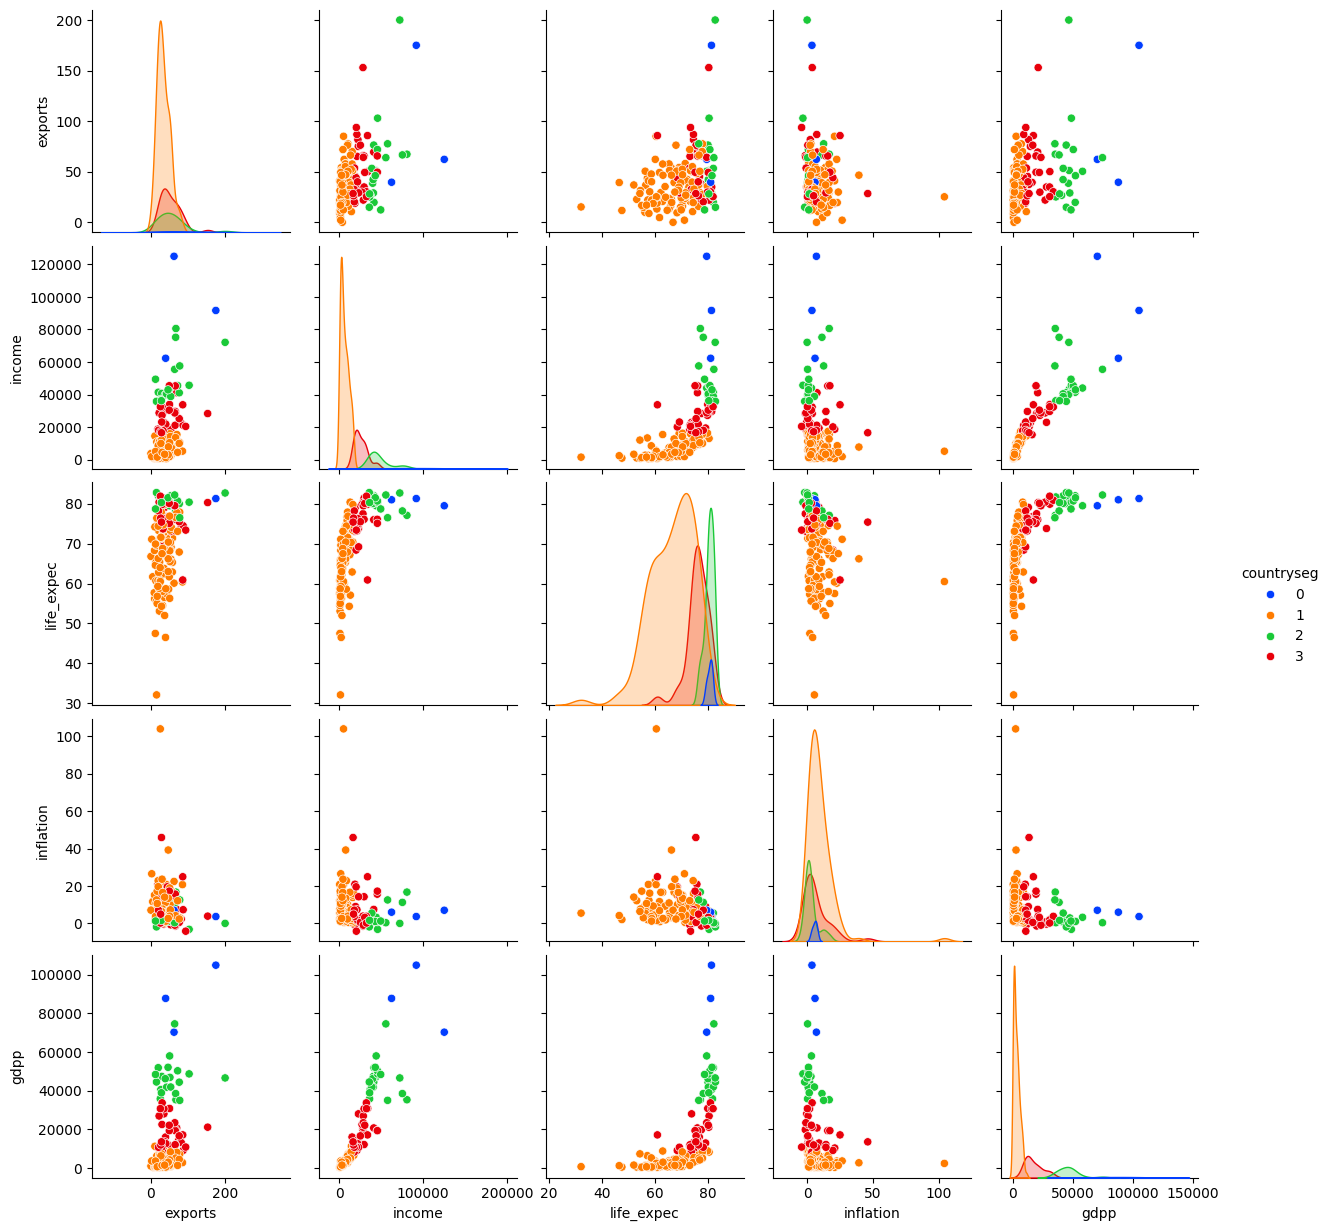

In [47]:
# Alumno: Volver a repetir el gráfico de pairplot que realizó antes
# con ['exports', 'income', 'life_expec', 'inflation']
# pero ahora utilizando para hue la columna countryseg
# Seleccionamos las columnas que queremos graficar
variables = ['exports', 'income', 'life_expec', 'inflation', 'gdpp']

# Creamos un pairplot utilizando la columna 'countryseg' para el parámetro hue
sns.pairplot(data=df3, vars=variables, hue='countryseg', palette='bright')
plt.show()

In [48]:
# Alumno: viendo los gráficos, principalmente el de ingresos (income), deteminar
# la categoría de cada cluster y colocarla en una columna countrycat.
# Utilizar lambda expresion en función de country_seg para crear
# esa nueva coulmna
# - desarrollado
# - desarrollandose
# - subdesarrollado

# Definir las categorías basadas en la observación de los gráficos y clusters
def categorizar_pais(cluster):
    if cluster == 0:  # Suponiendo que el cluster 0 corresponde a 'desarrollado'
        return 'desarrollado'
    elif cluster == 1:  # Suponiendo que el cluster 1 corresponde a 'desarrollandose'
        return 'desarrollandose'
    else:  # Suponiendo que el cluster 2 corresponde a 'subdesarrollado'
        return 'subdesarrollado'

# Crear la nueva columna 'countrycat' utilizando la función lambda y el resultado del modelo KMeans
df3['countrycat'] = df3['countryseg'].apply(lambda x: categorizar_pais(x))

# Verificamos las primeras filas para confirmar que se asignaron correctamente las categorías
print(df3[['countryseg', 'countrycat']].head())

   countryseg       countrycat
0           1  desarrollandose
1           1  desarrollandose
2           1  desarrollandose
3           1  desarrollandose
4           3  subdesarrollado


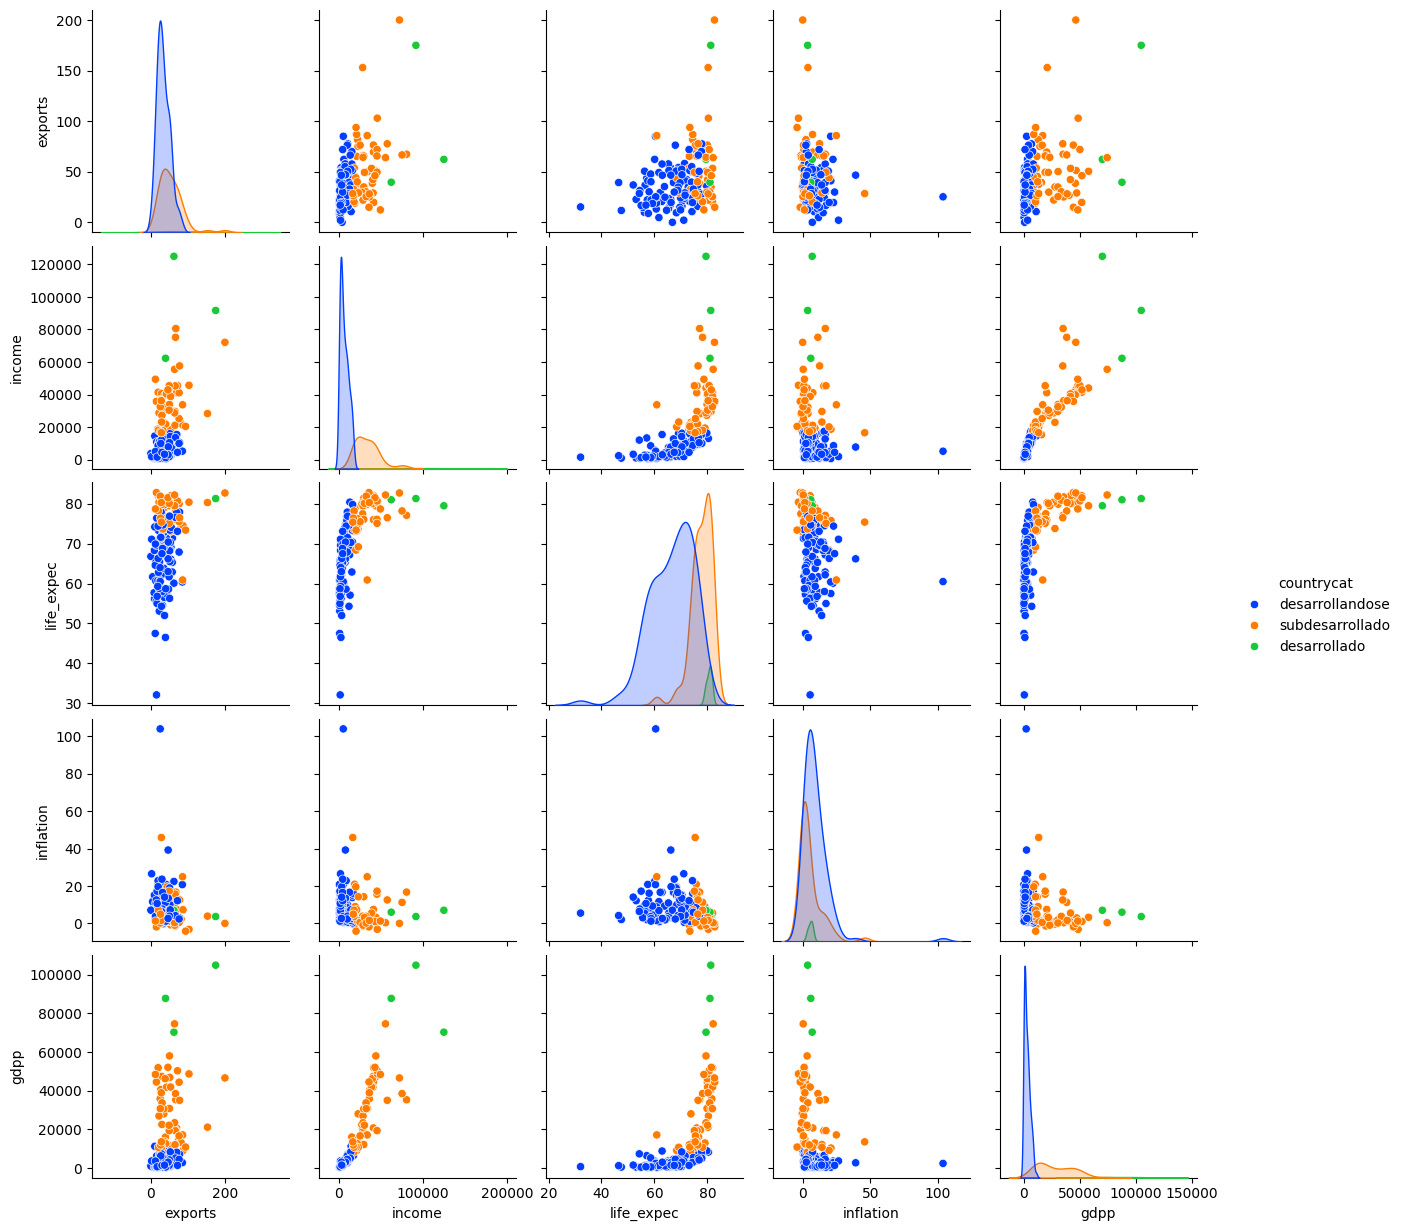

In [49]:
# Alumno: volver a graficar el gráfico anterior pero ahora usando en
# en hue = 'countrycat'

# Creamos un pairplot utilizando la columna 'countrycat' para el parámetro hue
sns.pairplot(data=df3, vars=variables, hue='countrycat', palette='bright')
plt.show()

<ipython-input-50-69d524981f88>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df3, x='countrycat', palette='bright')


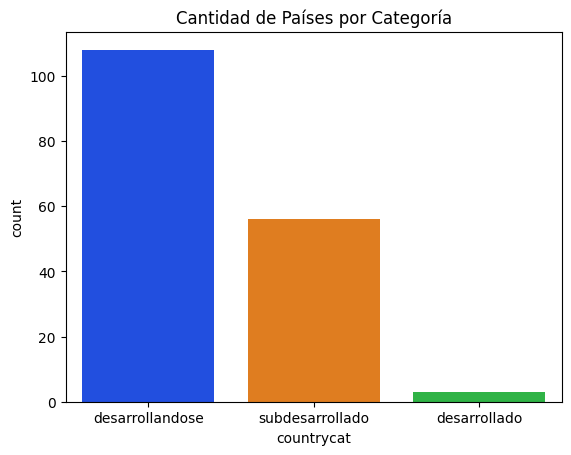

In [50]:
# Alumno: Determinar cuantas países hay en cada categoría
# utilizando el gráfico de seaborn countplot en la columna countrycat
# Crear un gráfico countplot para visualizar la cantidad de países en cada categoría de 'countrycat'
sns.countplot(data=df3, x='countrycat', palette='bright')

# Añadir un título al gráfico
plt.title('Cantidad de Países por Categoría')

# Mostrar el gráfico
plt.show()

Bueno ahora a jugar! Ahora puede buscar en su dataset algún país en general y ver su categoría según el modelo que armó

# Conclusión
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline7.png" width="1000" align="middle">